<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

# How to rediscover the Higgs boson yourself!
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to rediscover the Higgs boson yourself!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text

The idea is that cuts increase the ratio of signal ($H \rightarrow ZZ \rightarrow \ell\ell\ell\ell$) to background ($Z, t\bar{t}, ZZ \rightarrow \ell\ell\ell\ell$)

First, the amount of $Z$ and $t\bar{t}$ background is reduced, since these are quite different to the signal.

Then, the amount of $ZZ \rightarrow \ell\ell\ell\ell$ is reduced, whilst keeping as much $H \rightarrow ZZ \rightarrow \ell\ell\ell\ell$ signal as possible.

The datasets used in this notebook have already been filtered to include at least 4 leptons per event, so that processing is quicker.

This analysis loosely follows the [discovery of the Higgs boson by ATLAS](https://www.sciencedirect.com/science/article/pii/S037026931200857X) (mostly Section 4 and 4.1)

By the end of this notebook you will be able to:
1. rediscover the Higgs boson yourself!
2. know some general principles of a particle physics analysis

Feynman diagram pictures are borrowed from our friends at https://www.particlezoo.net

<CENTER><img src="images/feynman_diagrams/HZZ_feynman.png" style="width:40%"></CENTER>

<a id='contents'></a>

Contents: 

[Running a Jupyter notebook](#running) <br />
[First time setup on your computer (no need on mybinder)](#setup_computer) <br />
[To setup everytime](#setup_everytime) <br />
[Lumi, fraction, file path](#fraction) <br />
[Samples](#samples) <br />
[Changing a cut](#changing_cut) <br />
[Applying a cut](#applying_cut) <br />
[Plotting](#plotting) <br />
[What can you do to explore this analysis?](#going_further) <br />

<a id='running'></a>

## Running a Jupyter notebook

To run the whole Jupyter notebook, in the top menu click Cell -> Run All.

To propagate a change you've made to a piece of code, click Cell -> Run All Below.

You can also run a single code cell, by clicking Cell -> Run Cells, or using the keyboard shortcut Shift+Enter.

<a id='setup_computer'></a>

## First time setup on your computer (no need on mybinder)
This first cell only needs to be run the first time you open this notebook on your computer. 

If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.

If you open on mybinder, you don't need to run this cell.

In [137]:
import sys
# update the pip package installer
!{sys.executable} -m pip install --upgrade --user pip
# install required packages
!{sys.executable} -m pip install --upgrade --user uproot awkward vector matplotlib

[Back to contents](#contents)

<a id='setup_everytime'></a>

## To setup everytime
Cell -> Run All Below

to be done every time you re-open this notebook

We're going to be using a number of tools to help us:
* uproot: lets us read .root files typically used in particle physics into data formats used in python
* awkward: lets us store data as awkward arrays, a format that generalizes numpy to nested data with possibly variable length lists
* vector: to allow vectorized 4-momentum calculations
* numpy: provides numerical calculations such as histogramming
* matplotlib: common tool for making plots, figures, images, visualisations

In [18]:
import uproot # for reading .root files
import awkward as ak # to represent nested data in columnar format
import vector # for 4-momentum calculations
import time # to measure time to analyse
import math # for mathematical functions such as square root
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import AutoMinorLocator # for minor ticks
import infofile # local file containing cross-sections, sums of weights, dataset IDs
import newinfofile #neue Infofile

[Back to contents](#contents)

<a id='fraction'></a>

## Lumi, fraction, file path

General definitions of fraction of data used, where to access the input files

In [19]:
#lumi = 0.5 # fb-1 # data_A only
#lumi = 1.9 # fb-1 # data_B only
#lumi = 2.9 # fb-1 # data_C only
#lumi = 4.7 # fb-1 # data_D only
lumi = 10 # fb-1 # data_A,data_B,data_C,data_D

fraction = 1.0 # reduce this is if you want the code to run quicker
                                                                                                                                  
#tuple_path = "Input/4lep/" # local 
tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/" # web address
new_tuple_path = "/project/etp1/dkoch/ATLASOpenData-test/"

<a id='samples'></a>

## Samples

samples to process

In [20]:
samples = {

   'data': {
        'list' : ['data_A','data_B','data_C','data_D'],
   },

    r'Background $Z,t\bar{t}$' : { # Z + ttbar
         'list' : ['Zee','Zmumu','ttbar_lep'],
        'list': ['ttbar_lep'],
        'color' : "#6b59d3" # purple
    },

     r'Background $ZZ^*$' : { # ZZ
        'list' : ['llll'],
      'color' : "#ff0000" # red
    },

     r'Signal ($m_H$ = 125 GeV)' : { # H -> ZZ -> llll
        'list' : ['ggH125_ZZ4lep','VBFH125_ZZ4lep','WH125_ZZ4lep','ZH125_ZZ4lep'],
        'color' : "#00cdff" # light blue
    },

}

new_samples = {
  
    r'Background $Z,t\bar{t}$' : { # Z + ttbar
        'list' : [
            'user.garciarm.39227472._000001.output_ntup.root', 
            
            'user.garciarm.39227472._000002.output_ntup.root',
            'user.garciarm.39227472._000003.output_ntup.root',
            'user.garciarm.39227472._000004.output_ntup.root',
            'user.garciarm.39227472._000005.output_ntup.root',
           #bem 6 und 7 15 sind nicht da!
            'user.garciarm.39227472._000008.output_ntup.root',
            'user.garciarm.39227472._000009.output_ntup.root',
            'user.garciarm.39227472._000010.output_ntup.root',
            'user.garciarm.39227472._000011.output_ntup.root',
            'user.garciarm.39227472._000012.output_ntup.root',
            'user.garciarm.39227472._000013.output_ntup.root',
            'user.garciarm.39227472._000014.output_ntup.root',
   #und  15 sind nicht da!
            'user.garciarm.39227472._000016.output_ntup.root',
            'user.garciarm.39227472._000017.output_ntup.root',
            'user.garciarm.39227472._000018.output_ntup.root',
            'user.garciarm.39227472._000019.output_ntup.root',
            'user.garciarm.39227472._000020.output_ntup.root'
        ],
        'color' : "#00ff00" # GRUN
    },
}



### Units, as stored in the data files

In [21]:
MeV = 0.001
GeV = 1.0

[Back to contents](#contents)

Define function to get data from files.

The datasets used in this notebook have already been filtered to include at least 4 leptons per event, so that processing is quicker.

In [22]:
def get_data_from_files():

    data = {} # define empty dictionary to hold awkward arrays
    for s in samples: # loop over samples
        print('Processing '+s+' samples') # print which sample
        frames = [] # define empty list to hold data
        for val in samples[s]['list']: # loop over each file
            if s == 'data': prefix = "Data/" # Data prefix
            else: # MC prefix
                prefix = "MC/mc_"+str(infofile.infos[val]["DSID"])+"."
            fileString = tuple_path+prefix+val+".4lep.root" # file name to open
            print(fileString, val)
            temp = read_file(fileString,val) # call the function read_file defined below
            frames.append(temp) # append array returned from read_file to list of awkward arrays
        data[s] = ak.concatenate(frames) # dictionary entry is concatenated awkward arrays
    
    return data # return dictionary of awkward arrays


def get_data_from_new_files():

    new_data = {} # define empty dictionary to hold awkward arrays
    for s in new_samples: # loop over samples
        print('Processing NEW '+s+' samples') # print which sample
        frames = [] # define empty list to hold data
        for val in new_samples[s]['list']: # loop over each file
            if s == 'data': prefix = "Data/" # Data prefix  (Daten sind ausgeschlossen => unnotig?)
            else: #ttbar prefix
                prefix = "ttbar-samples-with-weights/"
            fileString = new_tuple_path+prefix+val # file name to open  
            print(fileString, val) 
            temp = read_file(fileString,val,treename="analysis") # call the function read_file defined below
            frames.append(temp) # append array returned from read_file to list of awkward arrays
        data[s] = ak.concatenate(frames) # dictionary entry is concatenated awkward arrays
    
    return new_data # return dictionary of awkward arrays

[Back to contents](#contents)

define function to calculate weight of MC event

In [23]:
def calc_weight(xsec_weight, events):
    return (
        xsec_weight
        * events.mcWeight
        * events.scaleFactor_PILEUP
        * events.scaleFactor_ELE
        * events.scaleFactor_MUON 
        * events.scaleFactor_LepTRIGGER
    )

In [48]:
def calc_new_weight(xsec_weight, events):
    return (
        xsec_weight
        * events.mcWeight
        * events.ScaleFactor_PILEUP
        * events.ScaleFactor_ELE
        * events.ScaleFactor_MUON 
        #* events.ScaleFactor_LepTRIGGER = 1 #keine LepTrigger bei tree.keys()
    )

define function to get cross-section weight

In [49]:
def get_xsec_weight(sample):
    info = infofile.infos[sample] # open infofile
    xsec_weight = (lumi*1000*info["xsec"])/(info["sumw"]*info["red_eff"]) #*1000 to go from fb-1 to pb-1
    return xsec_weight # return cross-section weight

In [50]:
def get_new_xsec_weight(sample):
    info = newinfofile.infos[sample] # open infofile
    xsec_weight = (lumi*1000*info["xsec"])/(info["sumw"]) #*1000 to go from fb-1 to pb-1  ?red_eff stets = 1 ?
    return xsec_weight # return cross-section weight

define function to calculate 4-lepton invariant mass.

Note: `lep_(pt|eta|phi|E)` are variable length lists of lepton momentum components for each event, represented by awkward arrays.

In [51]:
def calc_mllll(lep_pt, lep_eta, lep_phi, lep_E):
    # construct awkward 4-vector array
    p4 = vector.zip({"pt": lep_pt, "eta": lep_eta, "phi": lep_phi, "E": lep_E})
    
    # calculate invariant mass of first 4 leptons
    # [:, i] selects the i-th lepton in each event
    # .M calculates the invariant mass
    
  
    return (p4[:, 0] + p4[:, 1] + p4[:, 2] + p4[:, 3]).M * MeV

[Back to contents](#contents)

<a id='changing_cut'></a>

## Changing a cut

If you change a cut: Cell -> Run All Below

If you change a cut here, you also need to make sure the cut is applied in the "[Applying a cut](#applying_cut)" cell.

In [52]:
# cut on lepton charge
# paper: "selecting two pairs of isolated leptons, each of which is comprised of two leptons with the same flavour and opposite charge"
def cut_lep_charge(lep_charge):
# throw away when sum of lepton charges is not equal to 0
# first lepton in each event is [:, 0], 2nd lepton is [:, 1] etc

   
    return lep_charge[:, 0] + lep_charge[:, 1] + lep_charge[:, 2] + lep_charge[:, 3] != 0

# cut on lepton type
# paper: "selecting two pairs of isolated leptons, each of which is comprised of two leptons with the same flavour and opposite charge"
def cut_lep_type(lep_type):
# for an electron lep_type is 11
# for a muon lep_type is 13
# throw away when none of eeee, mumumumu, eemumu
    sum_lep_type = lep_type[:, 0] + lep_type[:, 1] + lep_type[:, 2] + lep_type[:, 3]
    return (sum_lep_type != 44) #& (sum_lep_type != 48) & (sum_lep_type != 52)check, ob. die gleich wsl sind.

In [53]:
tree = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root:mini")
#Braucht man einen neuen Tree ?

In [54]:
data = tree.arrays()
print(data)

[{runNumber: 298773, eventNumber: 134827213, channelNumber: 298773, ...}, ...]


In [55]:
type(data['runNumber'])

awkward.highlevel.Array

In [56]:

data[data['lep_type'][:, 0] == 11]
data[data['lep_type'][:, 1] == 13]

<Array [{runNumber: 298773, ...}, ..., {...}] type='13 * {runNumber: int32,...'>

[Back to contents](#contents)

<a id='applying_cut'></a>

## Applying a cut
If you add a cut: Cell -> Run All Below

In [57]:
def read_new_file(path,sample,treename="mini"):
    start = time.time() # start the clock
    print("\tProcessing: "+sample) # print which sample is being processed
    data_all = [] # define empty list to hold all data for this sample
    
    # open the tree called mini using a context manager (will automatically close files/resources)
    with uproot.open(path + ":" + treename) as tree:
        numevents = tree.num_entries # number of events
        if treename == "mini":
            if 'data' not in sample: xsec_weight = get_xsec_weight(sample) # get cross-section weight
        elif treename == "analysis":
            if "data" not in sample: xsec_weight = get_new_xsec_weight(sample)
        for data in tree.iterate(['lep_pt','lep_eta','lep_phi',
                                  'lep_E','lep_charge','lep_type', 
                                  # add more variables here if you make cuts on them 
                                  'mcWeight','scaleFactor_PILEUP',
                                  'scaleFactor_ELE','scaleFactor_MUON',
                                  'scaleFactor_LepTRIGGER'], # variables to calculate Monte Carlo weight
                                 library="ak", # choose output type as awkward array
                                 entry_stop=numevents*fraction): # process up to numevents*fraction

            nIn = len(data) # number of events in this batch

            if 'data' not in sample: # only do this for Monte Carlo simulation files
                # multiply all Monte Carlo weights and scale factors together to give total weight
                data['totalWeight'] = calc_weight(xsec_weight, data)

            # cut on lepton charge using the function cut_lep_charge defined above
            data = data[~cut_lep_charge(data.lep_charge)]

            # cut on lepton type using the function cut_lep_type defined above
            data = data[~cut_lep_type(data.lep_type)]

            # calculation of 4-lepton invariant mass using the function calc_mllll defined above
            data['mllll'] = calc_mllll(data.lep_pt, data.lep_eta, data.lep_phi, data.lep_E)

            # array contents can be printed at any stage like this
            #print(data)

            # array column can be printed at any stage like this
            #print(data['lep_pt'])

            # multiple array columns can be printed at any stage like this
            #print(data[['lep_pt','lep_eta']])

            nOut = len(data) # number of events passing cuts in this batch
            data_all.append(data) # append array from this batch
            elapsed = time.time() - start # time taken to process
            #print("\t\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s") # events before and after
    
    return ak.concatenate(data_all) # return array containing events passing all cuts

In [58]:
import time
import uproot
import awkward as ak

def read_file(path, sample, fraction=1.0, treename="mini"):
    start = time.time()  # start the clock
    print("\tProcessing: " + sample)  # print which sample is being processed
    data_all = []  # define empty list to hold all data for this sample
    
    # open the tree called mini using a context manager (will automatically close files/resources)
    with uproot.open(path + ":" + treename) as tree: #offnet die Datei mit gegebener URL als 'tree'
        numevents = tree.num_entries  # number of events (via .num entries() key ))
        if treename == "mini":
            if 'data' not in sample: 
                xsec_weight = get_xsec_weight(sample)  # get cross-section weight
            for data in tree.iterate(
                [
                    'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_charge', 'lep_type',
                    'mcWeight', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 
                    'scaleFactor_MUON', 'scaleFactor_LepTRIGGER'
                ],  # variables to calculate Monte Carlo weight
                library="ak",  # choose output type as awkward array
                entry_stop=int(numevents * fraction)  # process up to numevents*fraction
            ):
                nIn = len(data)  # number of events in this batch

                if 'data' not in sample:  # only do this for Monte Carlo simulation files
                    # multiply all Monte Carlo weights and scale factors together to give total weight
                    data['totalWeight'] = calc_weight(xsec_weight, data)

                # cut on lepton charge using the function cut_lep_charge defined above
                data = data[~cut_lep_charge(data.lep_charge)]

                # cut on lepton type using the function cut_lep_type defined above
                data = data[~cut_lep_type(data.lep_type)]

                # calculation of 4-lepton invariant mass using the function calc_mllll defined above
                data['mllll'] = calc_mllll(data.lep_pt, data.lep_eta, data.lep_phi, data.lep_E)

                nOut = len(data)  # number of events passing cuts in this batch
                data_all.append(data)  # append array from this batch
                elapsed = time.time() - start  # time taken to process
                print(f"\t\t nIn: {nIn},\t nOut: {nOut}\t in {round(elapsed, 1)}s")  # events before and after
        
        elif treename == "analysis":
            if 'data' not in sample: 
                xsec_weight = get_new_xsec_weight(sample)
            for data in tree.iterate(
                [
                    'lep_pt', 'lep_eta', 'lep_phi', 'lep_e', 'lep_charge', 'lep_type',
                    'mcWeight', 'ScaleFactor_PILEUP', 'ScaleFactor_ELE',
                    'ScaleFactor_MUON'#, 'ScaleFactor_LepTRIGGER'
                ],  # variables to calculate Monte Carlo weight
                library="ak",  # choose output type as awkward array
                entry_stop=int(numevents * fraction)  # process up to numevents*fraction
            ):
                nIn = len(data)  # number of events in this batch

                if 'data' not in sample:  # only do this for Monte Carlo simulation files
                    # multiply all Monte Carlo weights and scale factors together to give total weight
                    data['totalWeight'] = calc_new_weight(xsec_weight, data)

                # cut on lepton charge using the function cut_lep_charge defined above
                data = data[~cut_lep_charge(data.lep_charge)]

                # cut on lepton type using the function cut_lep_type defined above
                data = data[~cut_lep_type(data.lep_type)]

                # calculation of 4-lepton invariant mass using the function calc_mllll defined above
                data['mllll'] = calc_mllll(data.lep_pt, data.lep_eta, data.lep_phi, data.lep_E)

                nOut = len(data)  # number of events passing cuts in this batch
                data_all.append(data)  # append array from this batch
                elapsed = time.time() - start  # time taken to process
                print(f"\t\t nIn: {nIn},\t nOut: {nOut}\t in {round(elapsed, 1)}s")  # events before and after
    
    return ak.concatenate(data_all)  # return array containing events passing all cuts


[Back to contents](#contents)

This is where the processing happens

In [59]:
start = time.time() # time at start of whole processing
# data = get_data_from_files() # process all files
new_data = get_data_from_new_files()
elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Processing NEW Background $Z,t\bar{t}$ samples
/project/etp1/dkoch/ATLASOpenData-test/ttbar-samples-with-weights/user.garciarm.39227472._000001.output_ntup.root user.garciarm.39227472._000001.output_ntup.root
	Processing: user.garciarm.39227472._000001.output_ntup.root


IndexError: cannot slice ListArray (of length 2040025) with array(0): index out of range while attempting to get index 0 (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-34/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_next_at.cpp#L21)

This error occurred while attempting to slice

    <Array [[-1, 1], [-1], ..., [-1], [1, -1]] type='2040025 * var * int32'>

with

    (:, 0)

In [241]:
#data['Background $Z,t\\bar{t}$']['mllll'] #calculates the invariant mass
#data['Background $Z,t\\bar{t}$'].lep_pt
data['Background $Z,t\\bar{t}$'].lep_E


FieldNotFoundError: no field 'Background $Z,t\\bar{t}$' in record with 81 fields

This error occurred while attempting to slice

    <Array [{runNumber: 298773, ...}, ..., {...}] type='39 * {runNumber: in...'>

with

    'Background $Z,t\\bar{t}$'

In [242]:
plt.hist(data['Background $Z,t\\bar{t}$']['mllll'])
plt.hist(new_data['Background $Z,t\\bar{t}$']['mllll'])
plt.show()

FieldNotFoundError: no field 'Background $Z,t\\bar{t}$' in record with 81 fields

This error occurred while attempting to slice

    <Array [{runNumber: 298773, ...}, ..., {...}] type='39 * {runNumber: in...'>

with

    'Background $Z,t\\bar{t}$'

[Back to contents](#contents)

<a id='plotting'></a>

## Plotting
If you only want to make a change in plotting: Cell -> Run All Below

Define function to plot the data

In [154]:
def plot_data(data):
    xmin = 80
    xmax = 250
    step_size = 5
    bin_edges = np.arange(start=xmin, stop=xmax+step_size, step=step_size)
    bin_centres = np.arange(start=xmin+step_size/2, stop=xmax+step_size/2, step=step_size)
    data_x,_ = np.histogram(data['data']['mllll'], bins=bin_edges)
    data_x_errors = 0
    
    signal_x = data[r'Signal ($m_H$ = 125 GeV)']['mllll']
    signal_weights = data[r'Signal ($m_H$ = 125 GeV)'].totalWeight
    signal_color = samples[r'Signal ($m_H$ = 125 GeV)']['color']
    
    mc_x = [data[s]['mllll'] for s in samples if s not in ['data', r'Signal ($m_H$ = 125 GeV)']]
    mc_weights = [data[s].totalWeight for s in samples if s not in ['data', r'Signal ($m_H$ = 125 GeV)']]
    mc_colors = [samples[s]['color'] for s in samples if s not in ['data', r'Signal ($m_H$ = 125 GeV)']]
    mc_labels = [s for s in samples if s not in ['data', r'Signal ($m_H$ = 125 GeV)']]
    
    main_axes = plt.gca()

    mc_heights = main_axes.hist(mc_x, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
    mc_x_tot = mc_heights[0][-1]
    main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
    main_axes.set_xlim(left=xmin, right=xmax)
    
   
    main_axes.set_xlabel(r'4-lepton invariant mass $\mathrm{m_{4l}}$ [GeV]', fontsize=13, x=1, horizontalalignment='right')
    main_axes.set_ylabel('Events / '+str(step_size)+' GeV', y=1, horizontalalignment='right')
    main_axes.set_ylim(bottom=0, top=np.amax(data_x)*1.6)




   
    

    return


In [164]:
def plot_new_data(data):
    xmin = 80
    xmax = 250
    step_size = 5

    bin_edges = np.arange(start=xmin, stop=xmax+step_size, step=step_size)
    bin_centres = np.arange(start=xmin+step_size/2, stop=xmax+step_size/2, step=step_size)
    data_x,_ = np.histogram(data['Background $Z,t\\bar{t}$']['mllll'], bins=bin_edges)
    data_x_errors = 0
    
    signal_x = data['Background $Z,t\\bar{t}$']
    signal_weights = data['Background $Z,t\\bar{t}$'].totalWeight
    signal_color = new_samples['Background $Z,t\\bar{t}$']['color']
    
    mc_x = [data[s]['mllll'] for s in new_samples ]
    mc_weights = [data[s].totalWeight for s in new_samples ]
    mc_colors = [samples[s]['color'] for s in new_samples ]
    mc_labels = [s for s in new_samples]
    
    main_axes = plt.gca()

    mc_heights = main_axes.hist(mc_x, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
    mc_x_tot = mc_heights[0][-1]
    main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
    main_axes.set_xlim(left=xmin, right=xmax)
    
   
    main_axes.set_xlabel(r'4-lepton invariant mass $\mathrm{m_{4l}}$ [GeV]', fontsize=13, x=1, horizontalalignment='right')
    main_axes.set_ylabel('Events / '+str(step_size)+' GeV', y=1, horizontalalignment='right')
    main_axes.set_ylim(bottom=0, top=np.amax(data_x)*1.6)




   
    main_axes.legend(frameon=False)

    return


[Back to contents](#contents)

Call the function to plot the data

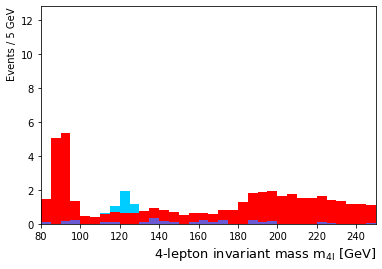

In [165]:
plot_data(data)



[Back to contents](#contents)

ValueError: cannot convert <RecordArray is_tuple='false' len='35'>
    <content index='0' field='lep_pt'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><ListOffsetArray len='1031'>
                <offsets><Index dtype='int64' len='1032'>
                    [   0    4    8 ... 4127 4131 4135]
                </Index></offsets>
                <content><NumpyArray dtype='float32' len='4135'>
                    [72882.97  38832.246 12576.012 ... 10386.254 10364.022
                      8407.727]
                </NumpyArray></content>
            </ListOffsetArray></content>
        </IndexedArray>
    </content>
    <content index='1' field='lep_eta'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><ListOffsetArray len='1031'>
                <offsets><Index dtype='int64' len='1032'>
                    [   0    4    8 ... 4127 4131 4135]
                </Index></offsets>
                <content><NumpyArray dtype='float32' len='4135'>
                    [-0.9124997  0.6198302 -1.5382785 ... -0.7793907  1.1430261
                     -2.0365002]
                </NumpyArray></content>
            </ListOffsetArray></content>
        </IndexedArray>
    </content>
    <content index='2' field='lep_phi'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><ListOffsetArray len='1031'>
                <offsets><Index dtype='int64' len='1032'>
                    [   0    4    8 ... 4127 4131 4135]
                </Index></offsets>
                <content><NumpyArray dtype='float32' len='4135'>
                    [ 0.144516    2.4599771  -2.8940504  ...  0.7079418
                      0.68114686 -0.22048417]
                </NumpyArray></content>
            </ListOffsetArray></content>
        </IndexedArray>
    </content>
    <content index='3' field='lep_E'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><ListOffsetArray len='1031'>
                <offsets><Index dtype='int64' len='1032'>
                    [   0    4    8 ... 4127 4131 4135]
                </Index></offsets>
                <content><NumpyArray dtype='float32' len='4135'>
                    [105391.     46533.734  30630.873 ...  13704.181  17904.354
                      32765.857]
                </NumpyArray></content>
            </ListOffsetArray></content>
        </IndexedArray>
    </content>
    <content index='4' field='lep_charge'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><ListOffsetArray len='1031'>
                <offsets><Index dtype='int64' len='1032'>
                    [   0    4    8 ... 4127 4131 4135]
                </Index></offsets>
                <content><NumpyArray dtype='int32' len='4135'>[-1  1  1 ...  1  1 -1]</NumpyArray></content>
            </ListOffsetArray></content>
        </IndexedArray>
    </content>
    <content index='5' field='lep_type'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><ListOffsetArray len='1031'>
                <offsets><Index dtype='int64' len='1032'>
                    [   0    4    8 ... 4127 4131 4135]
                </Index></offsets>
                <content><NumpyArray dtype='uint32' len='4135'>[13 13 11 ... 13 11 11]</NumpyArray></content>
            </ListOffsetArray></content>
        </IndexedArray>
    </content>
    <content index='6' field='mcWeight'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><NumpyArray dtype='float32' len='1031'>[1. 1. 1. ... 1. 1. 1.]</NumpyArray></content>
        </IndexedArray>
    </content>
    <content index='7' field='scaleFactor_PILEUP'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><NumpyArray dtype='float32' len='1031'>
                [1.2141223  0.59656215 1.3209485  ... 1.1961048  0.6960765
                 1.3209485 ]
            </NumpyArray></content>
        </IndexedArray>
    </content>
    <content index='8' field='scaleFactor_ELE'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><NumpyArray dtype='float32' len='1031'>
                [1.00336    0.9594338  0.96311    ... 0.93660307 0.97921
                 0.90892035]
            </NumpyArray></content>
        </IndexedArray>
    </content>
    <content index='9' field='scaleFactor_MUON'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><NumpyArray dtype='float32' len='1031'>
                [0.9922828  0.99809057 0.5175477  ... 0.98386043 0.9939327
                 0.99795383]
            </NumpyArray></content>
        </IndexedArray>
    </content>
    <content index='10' field='scaleFactor_LepTRIGGER'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><NumpyArray dtype='float32' len='1031'>
                [0.7506369 1.00582   1.00058   ... 0.98448   1.00192
                 0.99765  ]
            </NumpyArray></content>
        </IndexedArray>
    </content>
    <content index='11' field='totalWeight'>
        <IndexedArray len='35'>
            <index><Index dtype='int64' len='35'>
                [   8   12   30   48  149  173  211  215  232  238  265  449
                  450  453  458  527  542  545  561  566  648  671  684  772
                  811  818  819  846  854  894  920  931  936  943 1003]
            </Index></index>
            <content><NumpyArray dtype='float32' len='1031'>
                [0.0831725  0.05266913 0.06038918 ... 0.09946273 0.06221829
                 0.10957099]
            </NumpyArray></content>
        </IndexedArray>
    </content>
    <content index='12' field='mllll'>
        <NumpyArray dtype='float32' len='35'>
            [136.48753  173.8148    82.76314   92.28136  131.06236  172.65166
             267.3864   139.97981   95.84505  124.26087   97.70371  198.71948
             ...
             133.16336  113.46326  187.78648  248.57408  187.0012   141.73036
             168.0683    93.65898   96.24837  163.98456  140.81764 ]
        </NumpyArray>
    </content>
</RecordArray> into np.ndarray

This error occurred while calling

    ak.to_numpy(
        <Array [{lep_pt: [...], ...}, ..., {...}] type='35 * {lep_pt: var *...'>
        allow_missing = True
    )

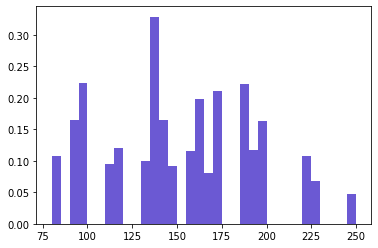

In [166]:
plot_new_data(data)

<a id='going_further'></a>

## What can you do to explore this analysis?

* Increase the fraction of data used in '[Lumi, fraction, file path](#fraction)'
* Check how many events are being thrown away by each cut in '[Applying a cut](#applying_cut)'
* Add more cuts from the [Higgs discovery paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X#se0040) in '[Changing a cut](#changing_cut)' and '[Applying a cut](#applying_cut)'
* Add a plot to show the ratio between Data and MC other than Higgs
* Add a plot to show the invariant mass distribution of the sub-leading lepton pair, like [Figure 1 of the Higgs discovery paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X#fg0010)
* Get the estimated numbers of events, like [Table 3 of the Higgs discovery paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X#tl0030)
* Add a plot of m12 against m34, like [Figure 3 of the Higgs discovery paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X#fg0030)
* Your idea!

[Back to contents](#contents)